<a href="https://colab.research.google.com/github/nicolasbini/tps-pod-nico-bini/blob/main/Copia_de_POD_01_Fuente_de_Datos_Individual_TEMPLATE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   **Año:** [2024]
*   **Alumno/a:** [Nicolas Bini]
*   **Legajo:** [LEGAJO]

# Archivos de texto plano

[gutenberg.org](https://www.gutenberg.org/) (llamado así por el inventor de la imprenta moderna) es el sitio web del Proyecto Gutenberg que se dedica a la distribución y creación de eBooks. En este sitio se encuentra el [Don Quijote](https://www.gutenberg.org/ebooks/14859). El Don Quijote se puede leer en diferentes formatos, ¿no? Para la tarea, se va a usar el Don Quijote de texto plano. La siguiente celda descarga el .txt y lo guarda en el sistema para luego su futura lectura:




In [ ]:
!wget https://www.gutenberg.org/cache/epub/2000/pg2000.txt

--2024-11-24 23:11:44--  https://www.gutenberg.org/cache/epub/2000/pg2000.txt
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2225845 (2.1M) [text/plain]
Saving to: ‘pg2000.txt’

pg2000.txt          100%[===================>]   2.12M  --.-KB/s    in 0.1s    

2024-11-24 23:11:45 (16.4 MB/s) - ‘pg2000.txt’ saved [2225845/2225845]



## Consignas

***NOTA: Para estas consignas, no se puede usar modulos externos a Python***

Del archivo descargado, calcular la cantidad de lineas:

In [ ]:
archivo = open('pg2000.txt','r')
lineas = archivo.readlines() #devuelve todas las lineas hasta '\n'
#print(lineas)
print(len(lineas))
archivo.close()

FileNotFoundError: [Errno 2] No such file or directory: 'pg2000.txt'

Del archivo descargado, calcular la cantidad de veces que se dice:
*   'Quijote'
*   'mancha'
*   'españa'

Considerar que, por ejemplo, 'QuiJoTe' es lo mismo que 'quijote' (no *case sensitive*).

In [ ]:
#print(lineas)

# no se puede usar count() ni find() :(

#creo una lista de todas las palabras
palabras = []

for linea in lineas:
  #normalizo las lineas y las separo por palabras
  linea = linea.lower()
# linea = linea.strip()
  linea = linea.split()
  # agrego a la lista de palabras
  palabras.extend(linea)

quijote = 0
mancha = 0
espania = 0

for palabra in palabras:
  if 'quijote' in palabra:
    quijote += 1
  elif 'mancha' in palabra:
    mancha += 1
  elif 'españa' in palabra:
    espania += 1

print('Quijote:',quijote)
print('Mancha:',mancha)
print('España:',espania)

NameError: name 'lineas' is not defined

In [ ]:
archivo = open('pg2000.txt','r')
lineas = archivo.readlines()[:20] # leer hasta 20 lineas
for linea in lineas:
  print(linea)
archivo.close()

#se ve que:

#Title: Don Quijote
#Author: Miguel de Cervantes Saavedra
print("----------------------------------------------------")
for linea in lineas:
  if 'Title:' in linea:
    print(linea)
  elif 'Author:' in linea:
    print(linea)

FileNotFoundError: [Errno 2] No such file or directory: 'pg2000.txt'

¿Quien es el autor y titulo del libro? Responderlo usando las herramientas utilizadas en la celda anterior (Tip: abrir el archivo de texto y ver como son las primeras lineas).

In [ ]:
#Escribir el codigo para responder la pregunta en esta celda

# Archivos .csv

*Robert* De Niro actuó en mas de 100 peliculas y Rotten Tomatoes es un sitio web en el que se pueden leer criticas y ratings a peliculas hechos por críticos y usuarios. La siguiente linea descarga un archivo .csv en el que tenemos peliculas de De Niro junto a su rating en Rotten Tomatoes:

In [ ]:
!wget https://people.sc.fsu.edu/~jburkardt/data/csv/deniro.csv

## Consignas

***NOTA: Apartir de aca, se pueden usar modulos externos de Python***

Sabemos que el archivo tiene en su primera linea los 'headers'. ¿Cuales son? Imprimirlos.

In [ ]:
archivo = open('deniro.csv','r')
lineas = archivo.readlines()
print(lineas[0])
archivo.close()

FileNotFoundError: [Errno 2] No such file or directory: 'deniro.csv'

Convertir la información del archivo .csv a un diccionario.

In [ ]:
import csv
lista = []
archivo = open('deniro.csv','r')
# Es necesario usar atributos adicionales para tomar en cuenta los nombres de
# no convencionales de las paeliculas (que contienen apostrophee ')
reader = csv.DictReader(archivo, quotechar='"', delimiter=',', skipinitialspace=True)
for row in reader:
  lista.append(row)
archivo.close()
#print(lista)
for item in lista:
  print(item)

¿Cuantas peliculas hay registradas en el archivo .csv?

In [ ]:
print("Son", len(lista), "peliculas en la lista")

Imprimir las peliculas mejor y peor rankeadas del archivo (imprimir sus respectivos rankings)

In [ ]:
print(type(lista[0]["Score"]))
# El score esta en formato str

# Necesito convertirlos a int
for i in range(len(lista)):
  lista[i]["Score"] = int(lista[i]["Score"])

print(type(lista[0]["Score"]))

print('----------------------------------------------------')

#seteo los valores defaults
mejor = [lista[0]["Score"],lista[0]["Title"]]
peor = [lista[0]["Score"],lista[0]["Title"]]

for i in range(len(lista)):
  if lista[i]["Score"] > mejor[0]:
    mejor = [lista[i]["Score"],lista[i]["Title"]]
  if lista[i]["Score"] < peor[0]:
    peor = [lista[i]["Score"],lista[i]["Title"]]

print("Mejor pelicula:", mejor[1], "con el rating de", mejor[0])
print("Mejor pelicula:", peor[1], "con el rating de", peor[0])

# Base de datos - Relacionales

SQLite es una biblioteca de C que provee una base de datos ligera basada en disco que no requiere un proceso de servidor separado y permite acceder a la base de datos usando una variación no estándar del lenguaje de consulta SQL. Algunas aplicaciones pueden usar SQLite para almacenamiento interno. También es posible prototipar una aplicación usando SQLite y luego transferir el código a una base de datos más grande como PostgreSQL u Oracle.

Realizamos el `import` e indicamos el archivo en el que vamos a guardar la base de datos:

In [ ]:
import sqlite3
conn = sqlite3.connect('db.db')

La siguiente linea de codigo agrega filas a la misma. Por favor, ejecutar la siguiente celda para la consigna:



In [ ]:
!wget https://people.sc.fsu.edu/~jburkardt/data/csv/snakes_count_10000.csv

cur = conn.cursor()
cur.execute("CREATE TABLE t (GameNumber, GameLength);")

with open('snakes_count_10000.csv','r') as csv_file:
  lines = csv_file.readlines()[1:]
  lines = [l.split(',') for l in lines]
  to_db = [(l[0].strip(), l[1].strip()) for l in lines]

cur.executemany("INSERT INTO t (GameNumber, GameLength) VALUES (?, ?);", to_db)
conn.commit()
conn.close()

--2024-11-28 16:34:06--  https://people.sc.fsu.edu/~jburkardt/data/csv/snakes_count_10000.csv
Resolving people.sc.fsu.edu (people.sc.fsu.edu)... 144.174.0.22
Connecting to people.sc.fsu.edu (people.sc.fsu.edu)|144.174.0.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89011 (87K) [text/csv]
Saving to: ‘snakes_count_10000.csv’

snakes_count_10000. 100%[===================>]  86.92K  --.-KB/s    in 0.06s   

2024-11-28 16:34:06 (1.34 MB/s) - ‘snakes_count_10000.csv’ saved [89011/89011]



## Consignas

¿Como luce la base de datos? Imprimirla.


In [ ]:
# me conecto a db y seteo el cursor
conn = sqlite3.connect('db.db')
cur = conn.cursor()
# selecciono todo de t
cur.execute("SELECT * FROM t;")
filas = cur.fetchall()
# imprimo
for fila in filas:
  print(fila)
conn.close()

NameError: name 'sqlite3' is not defined

¿Cuantas filas hay en la base de datos?

In [ ]:
# me conecto a db y seteo el cursor
conn = sqlite3.connect('db.db')
cur = conn.cursor()

# selecciono la cantidad de t
cur.execute("SELECT COUNT(*) FROM t;")
cantidad = cur.fetchone()[0]
print(cantidad)

conn.close()

NameError: name 'sqlite3' is not defined

¿Cual es el máximo `GameLength` y en qué `GameNumber` se realizó?

In [ ]:
# los valores en la base de datos estan en formato str
# primero tengo que convertirlos a int

conn = sqlite3.connect('db.db')
cur = conn.cursor()

cur.execute("UPDATE t SET GameLength = CAST(GameLength AS INTEGER);")

#guardo los cambios
conn.commit()

conn.close()

NameError: name 'sqlite3' is not defined

# API Requests
Por lo general, conseguimos datos a traves de internet. Aunque el concepto de Application Programming Interface (API) es muy amplio y muy poco concreto, en el contexto de los servidores, es un conjunto de 'endpoints' que los servidores ofrecen para poder leer/procesar/escribir información en estos mismos.

[En este repositorio](https://github.com/public-apis/public-apis) van a encontrar una lista de APIs públicas (pueden elegir otras que no son de ese repositorio). Para la consigna, se recomienda usar aquellas APIs que no requieren autenticación. Si se elige una API con autenticación, por favor, adjuntar las keys o pasarl las credenciales necesarias para su futura ejecución También, pueden usar varias URLs.

## Consigna

Hacer una request GET e imprimir uno de los campos de la respuesta:

In [ ]:
import requests


api = "https://uselessfacts.jsph.pl/api/v2/facts/random?language=en"

solicitud = requests.get(api)

if solicitud.status_code == 200:
    data = solicitud.json()

    for llave in data:
      print(llave,':', data[llave])
else:
    print("Error. No se puede acceder a la API:", solicitud.status_code)
print("----------------------------------------------------")
fact = data.get("text")
print("Useles fact:", fact)

id : 6e12cb26f227e31f849c73be00c6ded1
text : You burn more calories sleeping than you do watching TV.
source : djtech.net
source_url : http://www.djtech.net/humor/useless_facts.htm
language : en
permalink : https://uselessfacts.jsph.pl/api/v2/facts/6e12cb26f227e31f849c73be00c6ded1
----------------------------------------------------
Useles fact: You burn more calories sleeping than you do watching TV.


Hacer una request GET y, apartir de los campos en la respuesta, generar otro campo (por ejemplo, si la respuesta solo incluye un timestamp y una posición del registro, elaborar la velocidad del registro)

In [ ]:
api = "https://uselessfacts.jsph.pl/api/v2/facts/random?language=en"

solicitud = requests.get(api)

if solicitud.status_code == 200:
    data = solicitud.json()

    fact = data.get("text")
    print("Useless fact:", fact)
    print("----------------------------------------------------")
    print("La cantidad de palabras:",len(fact.split()))

else:
    print("Error. No se puede acceder a la API:", solicitud.status_code)

Useless fact: It has been estimated that humans use only 10% of their brain.
----------------------------------------------------
La cantidad de palabras: 12


# Streaming data
Ahora vamos a hacer algo muy parecido a lo anterior, pero vamos a usar APIs que nos ofrecen datos en tiempo real. Pueden encontrar APIs de este estilo [en este repositorio](https://github.com/ColinEberhardt/awesome-public-streaming-datasets) (pueden elegir otras que no son de ese repositorio)

## Consigna

Hacer un plot con `matplotlib` de una variable de una API de datos streaming en el que el eje 'y' sea la variable y el eje 'x' el tiempo.

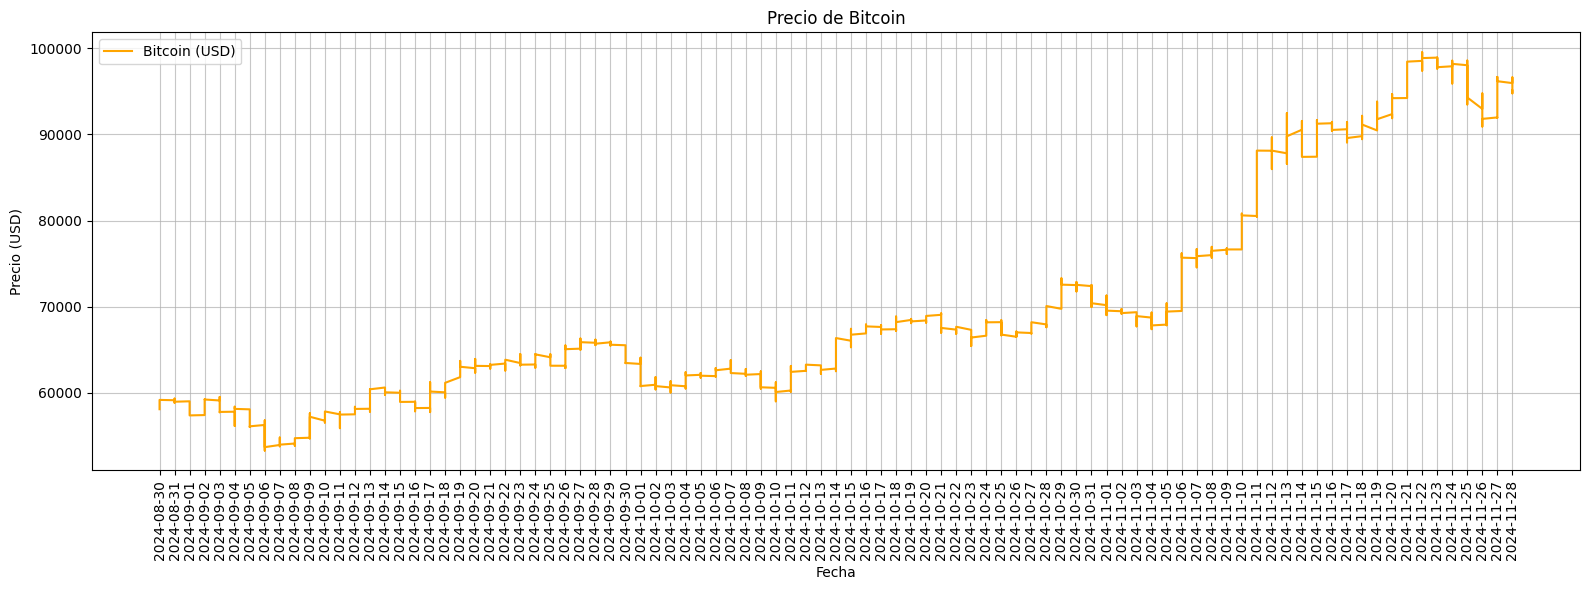

In [ ]:
import requests
import matplotlib.pyplot as plt
from datetime import datetime

# precio de bitcoin en dolares la maxima cantidad de dias
def precio_bitcoin():
    url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart"
    params = {"vs_currency": "usd", "days": 90}
    response = requests.get(url, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error: {response.status_code} - {response.text}")
        return None

plt.figure(figsize=(16, 6))
data = precio_bitcoin()
if data:
  prices = data["prices"]
  times = [datetime.utcfromtimestamp(price[0] / 1000).strftime("%Y-%m-%d") for price in prices]
  values = [price[1] for price in prices]
  plt.plot(times, values, label="Bitcoin (USD)", color="orange")


plt.title("Precio de Bitcoin")
plt.xlabel("Fecha")
plt.ylabel("Precio (USD)")
plt.xticks(rotation=90)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.7)
plt.tight_layout()
plt.show()